# DATA SCIENCE PROJECT ON INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS :-

# BUISNESS CASE: BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE

###  MODEL CREATION & EVALUATION SUMMARY :-

* Loading pre-process data
* Define dependant & independant features
* Balancing the target feature
* Split training and testing data
* Model creation, prediction & evaluation
* Model saving


## IMPORT NECESSARY LIBRARY :-

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

## LOADING PREPROCESS DATA :-

In [2]:
data = pd.read_csv('employee_performance_analysis_and_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


## DEFINE INDEPENDANT & DEPENDANT FEATURES :-

In [3]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [5]:
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894


In [6]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [7]:
y.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

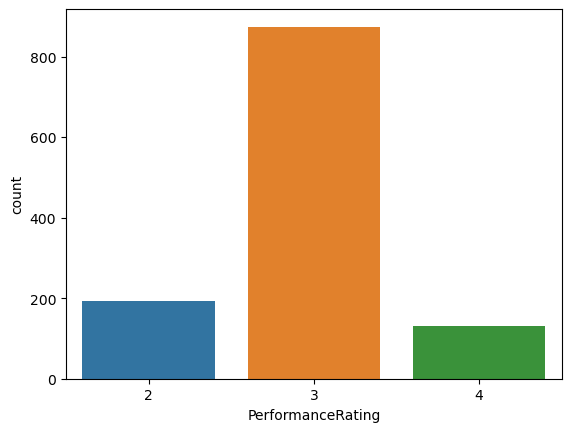

In [12]:
#Plotting the graph
sns.countplot(y)
plt.show()

* Target feature is not balance.

### BALANCING THE TARGET FEATURE :-

**SMOTE :-** SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


* Now target feature in balance.

## SPLIT TRAINING AND TESTING DATA :-

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testin

In [18]:
# Check shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2097, 25)
(525, 25)
(2097,)
(525,)


## MODEL CREATION, PREDICTION AND EVALUATION :-


**AIM :-**

* Create a sweet spot model (Low bias, Low variance)

**HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM**

1. Support Vector Machine
2. Random Forest
3. Artificial Neural Network [MLP Classifier]

## 1. Support Vector Machine :-

In [19]:
# importing library
from sklearn.svm import SVC

# Object Creaation
svc = SVC()

# Fitting training and testing data
svc.fit(X_train,y_train)

# Prediction on train data
svc_train_predict = svc.predict(X_train)

# Prediction on test data
svc_test_predict = svc.predict(X_test)

### TRAINING ACCURACY :-

In [20]:
# import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy of support vector classifier model",svc_train_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_train_predict,y_train))

Training accuracy of support vector classifier model 96.6618979494516
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       1.00      0.95      0.97       722
           3       0.92      0.98      0.95       659
           4       0.98      0.97      0.98       716

    accuracy                           0.97      2097
   macro avg       0.97      0.97      0.97      2097
weighted avg       0.97      0.97      0.97      2097



* Support vector classifier perform well on training data.

### TESTING ACCURACY :-

In [21]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy of support vector classifier model",svc_test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(svc_test_predict,y_test))

Testing accuracy of support vector classifier model 95.04761904761905
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.95      0.97       191
           3       0.87      0.97      0.92       155
           4       0.99      0.93      0.96       179

    accuracy                           0.95       525
   macro avg       0.95      0.95      0.95       525
weighted avg       0.95      0.95      0.95       525



* In testing score is still lagging so we are going to do hyperparameter tunning with the help of grid search cv.

### HYPER PARAMETER TUNNING WITH GRID SEARCH CV :-

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.5,10,50,60,70,80],
             'gamma':[1,0.1,0.001,0.0001,0.00001],
             'random_state':(list(range(1,20)))}
model = SVC() # Object creation
grid = GridSearchCV(model,param_grid,refit=True,verbose=2,scoring='f1',cv=5)

# Step:10 fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   2.4s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END .................C=0.1, gamma=0.001, random_state=3; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=4; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=5; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=6; total time=   0.0s
[CV] END .................C=

[CV] END ................C=0.1, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END ................C=0.1, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END ................C=0

[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=0.5, gamma=1, random_state=9; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=10; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ....................C=0.5, gamma=1, random_state=11; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C=0.5, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ..................C

[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=13; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0.5, gamma=0.001, random_state=14; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.5, gamma=0.0001, random_state=14; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ...............C=0.5, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ...............C=0.

[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=16; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=17; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0.5, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END ................C=0

[CV] END .....................C=10, gamma=1, random_state=17; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=18; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=19; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=5; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=1e-05, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=

[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ................C=5

[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=13; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=14; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=1e-05, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=15; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=17; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=1; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C=60, gamma=1e-05, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ....................C=70, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=1e-05, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=70, gamma=1e-05, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=80, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=80, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=80, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=80, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=

[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=80, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=8

[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=18; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s
[CV] END .................C=80, gamma=1e-05, random_state=19; total time=   0.0s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 10, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [23]:
# set the best parameter 
clf =SVC(C=0.6,gamma=0.1,random_state=1)

# fit the model
clf.fit(X_train,y_train)

# Predict the x test
y_hat_clf = clf.predict(X_test)

### TESTING ACCURACY AFTER HYPERPARAMETER TUNNING :-

In [24]:
test_accuracy = accuracy_score(y_hat_clf,y_test)
print("Testing accuracy of support vector classifier model",test_accuracy*100)
print("support vector classifier Classification report: \n",classification_report(y_hat_clf,y_test))

Testing accuracy of support vector classifier model 98.66666666666667
support vector classifier Classification report: 
               precision    recall  f1-score   support

           2       0.98      0.99      0.99       182
           3       0.98      0.98      0.98       172
           4       1.00      0.98      0.99       171

    accuracy                           0.99       525
   macro avg       0.99      0.99      0.99       525
weighted avg       0.99      0.99      0.99       525



* After hyperparameter tunning score is increases.

## 2. Random Forest :-

In [25]:
# importing libary and creating object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree

# fitting training data
rf.fit(X_train,y_train)

# Prediction on testing data
rf_test_predict = rf.predict(X_test)

# Prediction on training data
rf_train_predict = rf.predict(X_train)

### TRANING ACCURACY :-

In [26]:
rf_train_accuracy = accuracy_score(rf_train_predict,y_train)
print("Training accuracy of random forest",rf_train_accuracy)
print("Classification report of training: \n",classification_report(rf_train_predict,y_train))

Training accuracy of random forest 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



* Random forest classifier very well work on training data.

### TESTING ACCURACY :-

In [27]:
rf_test_accuracy = accuracy_score(rf_test_predict,y_test)
print("Testing accuracy of random forest",rf_test_accuracy*100)
print("Classification report of testing: \n",classification_report(rf_test_predict,y_test))

Testing accuracy of random forest 96.19047619047619
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.99      0.96      0.97       190
           3       0.91      0.98      0.94       161
           4       0.99      0.95      0.97       174

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



### HYPER PARAMETER TUNNING WITH RANDOMIZED SEARCH CV :-

In [28]:
# import library and imputation of parameter
from sklearn.model_selection import RandomizedSearchCV  
#In random forest we are not used grid search CV because of memory reason.

n_estimators = [int(x) for x in np.linspace(start=100 ,stop=2000, num=10)] #No of decision tree in forest
max_features = ['auto', 'sqrt'] #Max no of feature consider to create decision tree
max_depth    = [int(x) for x in np.linspace(10,100,num=11)] #Max no of level in each decision tree
max_depth.append(None)
min_samples_split = [2,3,5,8] #Min number of data points placed in a node before the node is split
min_samples_leaf  = [1,2,3,4]  #Min number of data point allowed in leaf node

# Creating dictionary of paramter
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Object creation
rf_clf = RandomForestClassifier(random_state=42) #Provide random state because select rows and columns randomly

# Create Random search CV with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf,scoring='f1',param_distributions=random_grid,
                           n_iter=10,cv=2,verbose=2,random_state=1,n_jobs=-1)

# Fitting the training data
rf_cv.fit(X_train,y_train)

# Get best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameter: {rf_best_params}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameter: {'n_estimators': 311, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 37}


In [29]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**rf_best_params)

# Fitting the training data
rf_clf1.fit(X_train,y_train)

# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

### TEST ACCURACY AFTER HYPER-PARAMETER TUNNING :-

In [30]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 94.28571428571428
Classification report: 
               precision    recall  f1-score   support

           2       0.97      0.94      0.95       191
           3       0.87      0.96      0.91       156
           4       0.99      0.93      0.96       178

    accuracy                           0.94       525
   macro avg       0.94      0.94      0.94       525
weighted avg       0.95      0.94      0.94       525



* After hyperparameter tunning score is not increases.

## 3. Artificial Neural Network [MLP Classifier] :-

In [31]:
# Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)

In [32]:
# Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [33]:
# Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[2.30421098e-05, 9.99976016e-01, 9.42042015e-07],
       [1.77214279e-06, 9.99867940e-01, 1.30288096e-04],
       [9.77457009e-01, 2.24913483e-02, 5.16429631e-05],
       ...,
       [9.92776079e-01, 7.22277763e-03, 1.14366856e-06],
       [6.08788283e-02, 9.38985245e-01, 1.35926443e-04],
       [3.18940152e-20, 9.10007711e-11, 1.00000000e+00]])

In [34]:
# Prediction on test data
mlp_test_predict = model.predict(X_test)

# Prediction on training data
mlp_train_predict = model.predict(X_train)

### TRAINING ACCURACY :-

In [35]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 99.14163090128756
Classification report of training:
               precision    recall  f1-score   support

           2       1.00      0.97      0.99       708
           3       0.97      1.00      0.99       683
           4       1.00      1.00      1.00       706

    accuracy                           0.99      2097
   macro avg       0.99      0.99      0.99      2097
weighted avg       0.99      0.99      0.99      2097



* Multilayer percepton Perform well on training data.


### TESTING ACCURACY :-

In [36]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 96.76190476190476
Classification report of testing:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       185
           3       0.92      0.98      0.95       162
           4       1.00      0.94      0.97       178

    accuracy                           0.97       525
   macro avg       0.97      0.97      0.97       525
weighted avg       0.97      0.97      0.97       525



* Multilayer percepton perform well on testing data.

### CONFUSION MATRIX :-

In [37]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,181,4,0
3,3,159,0
4,0,10,168


### Conclusion :-

* Support vector machine well perform on training data with accuracy 96.66% but the test score is 95.04 after applying Hyperparameter tunning score is 98.66 means model is overfit.

* Random forest very well perform in training data with 100% accuracy but in testing 96.19% after doing hyperparameter tunning testing score is decreases.

* Artifical neural network[Multilayer percepton] perform very well on training data with 99.14% accuracy and testing score is 96.76%.
* So we are select Artifical neuranl network [Multilayer percepton] model.

## MODEL SAVING :-

In [38]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(model,file)